In [124]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [125]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [126]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [127]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [128]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [131]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
jun_results = []
jun_results = session.query(Measurement.date,Measurement.tobs).filter(extract('month',Measurement.date) == 6).all()
jun_results

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [132]:
#  3. Convert the June temperatures to a list.
def temp_lst(t):
    return list(np.ravel(t))

june_temps = temp_lst(jun_results)
june_temps

['2010-06-01',
 '78.0',
 '2010-06-02',
 '76.0',
 '2010-06-03',
 '78.0',
 '2010-06-04',
 '76.0',
 '2010-06-05',
 '77.0',
 '2010-06-06',
 '78.0',
 '2010-06-07',
 '77.0',
 '2010-06-08',
 '78.0',
 '2010-06-09',
 '78.0',
 '2010-06-10',
 '79.0',
 '2010-06-11',
 '78.0',
 '2010-06-12',
 '78.0',
 '2010-06-13',
 '78.0',
 '2010-06-14',
 '77.0',
 '2010-06-15',
 '78.0',
 '2010-06-16',
 '78.0',
 '2010-06-17',
 '77.0',
 '2010-06-18',
 '77.0',
 '2010-06-19',
 '82.0',
 '2010-06-20',
 '78.0',
 '2010-06-21',
 '78.0',
 '2010-06-22',
 '78.0',
 '2010-06-23',
 '78.0',
 '2010-06-24',
 '78.0',
 '2010-06-25',
 '77.0',
 '2010-06-26',
 '76.0',
 '2010-06-27',
 '78.0',
 '2010-06-28',
 '78.0',
 '2010-06-29',
 '78.0',
 '2010-06-30',
 '78.0',
 '2011-06-01',
 '77.0',
 '2011-06-02',
 '78.0',
 '2011-06-03',
 '73.0',
 '2011-06-04',
 '70.0',
 '2011-06-05',
 '76.0',
 '2011-06-06',
 '77.0',
 '2011-06-07',
 '77.0',
 '2011-06-08',
 '77.0',
 '2011-06-09',
 '77.0',
 '2011-06-10',
 '78.0',
 '2011-06-11',
 '77.0',
 '2011-06-12',
 

In [133]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df_june = pd.DataFrame(jun_results, columns=['date','June Temps'])
df_june

,date,June Temps
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [134]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
print(df_june.describe())

        June Temps
count  1700.000000
mean     74.944118
std       3.257417
min      64.000000
25%      73.000000
50%      75.000000
75%      77.000000
max      85.000000


## D2: Determine the Summary Statistics for December

In [135]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_results = []
dec_results = session.query(Measurement.date,Measurement.tobs).filter(extract('month',Measurement.date) == 12).all()
dec_results

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [136]:
# 7. Convert the December temperatures to a list.
dec_temps = temp_lst(dec_results)

In [137]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df_dec = pd.DataFrame(dec_results, columns=['date','December Temps'])
df_dec.head(2)

,date,December Temps
0,2010-12-01,76.0
1,2010-12-03,74.0


In [138]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
print(df_dec.describe())

       December Temps
count     1517.000000
mean        71.041529
std          3.745920
min         56.000000
25%         69.000000
50%         71.000000
75%         74.000000
max         83.000000


In [140]:
#Additional query #1
dec_rain = []
dec_rain = session.query(Measurement.date,Measurement.prcp).filter(extract('month',Measurement.date) == 12).all()
df_d_rain = pd.DataFrame(dec_rain, columns=['date', 'Dec Rain'])
df_d_rain_stat = df_d_rain.describe()

In [141]:
#Additional query #2
jun_rain = []
jun_rain = session.query(Measurement.date,Measurement.prcp).filter(extract('month',Measurement.date) == 6).all()
df_j_rain = pd.DataFrame(jun_rain, columns=['date', 'Jun Rain'])
df_j_rain_stat = df_j_rain.describe()

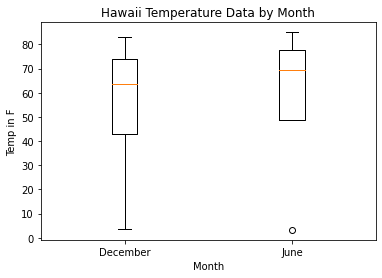

In [145]:
dec_data = (df_dec['December Temps'].std(),df_dec['December Temps'].mean(),df_dec['December Temps'].max(),df_dec['December Temps'].min())

june_data = (df_june['June Temps'].std(),df_june['June Temps'].mean(),df_june['June Temps'].max(),df_june['June Temps'].min())

data = [dec_data,june_data]
labels = ['December','June']

fig7, ax7 = plt.subplots()
ax7.set_title('Hawaii Temperature Data by Month')
ax7.boxplot(data, labels=labels)
ax7.set_ylabel("Temp in F")
ax7.set_xlabel("Month")

plt.savefig('C:/Users/ryanj/github/surfs_up/box_plot_temp.png')
plt.show()

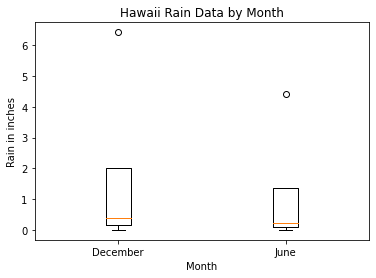

In [146]:
dec_r_data = (df_d_rain['Dec Rain'].std(),df_d_rain['Dec Rain'].mean(),df_d_rain['Dec Rain'].max(),df_d_rain['Dec Rain'].min())

june_r_data = (df_j_rain['Jun Rain'].std(),df_j_rain['Jun Rain'].mean(),df_j_rain['Jun Rain'].max(),df_j_rain['Jun Rain'].min())

data = [dec_r_data,june_r_data]
labels = ['December','June']

fig8, ax8 = plt.subplots()
ax8.set_title('Hawaii Rain Data by Month')
ax8.boxplot(data, labels=labels)
ax8.set_ylabel("Rain in inches")
ax8.set_xlabel("Month")

plt.savefig('C:/Users/ryanj/github/surfs_up/box_plot_rain.png')
plt.show()

(3.2574170516565566, 74.94411764705882, 85.0, 64.0)